In [38]:
import facet_ml
from facet_ml.classification.model_using import ModelApplication
from facet_ml.classification.model_training import load_feature_config
from facet_ml.static.path import STATIC_MODELS
from sklearn import metrics
import glob
import pandas as pd
import numpy as np
import pickle
import os
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

In [39]:
# Load Data from training
training_folder = os.path.join("..","..","ProcessedData","Training_Data_20231106")

csv_list = glob.glob(os.path.join(training_folder,"*"))
df_list = [pd.read_csv(csv,index_col=0) for csv in csv_list]

# Process data
df_total = pd.concat(df_list)
df_total.reset_index(drop=True)
df_total.replace([np.inf, -np.inf], np.nan, inplace=True)
df_total.dropna(axis=0,inplace=True)
df_total.drop(labels=["label","Filename","Region"],axis=1,inplace=True)

# Get and use features
features_oi = load_feature_config("default_features-agnostic")
X = df_total[features_oi]
y = df_total.Labels

In [40]:
# Load models
def load_model(pickle_path:str):
    with open(pickle_path,"rb") as f:
        model = pickle.load(f)

    return model

C_v_MC = load_model(STATIC_MODELS["crystal_multicrystal"])
Crys_v_Nocrys = load_model(STATIC_MODELS["crystalline_noncrystalline"])
total = load_model(STATIC_MODELS["crystal_multicrystal_incomplete"])

Text(0.5, 0, 'Random Forest Feature Importance')

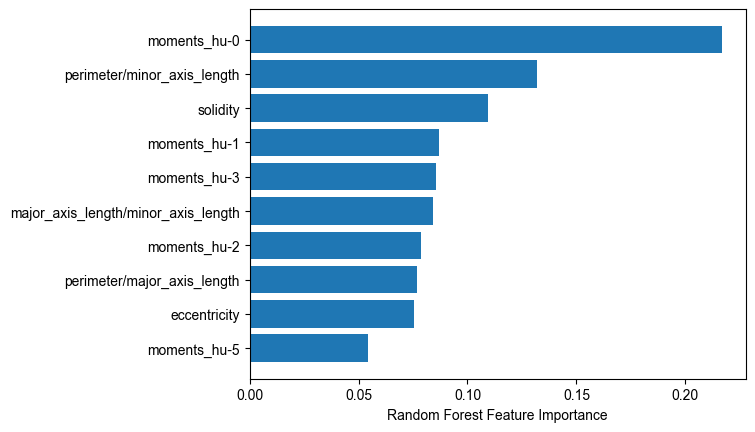

In [52]:
def feature_importance_model(model_run,title):
    sorted_idx = model_run["model"].feature_importances_.argsort()
    plt.barh(X.columns[sorted_idx], total["model"].feature_importances_[sorted_idx])
    plt.xlabel("Random Forest Feature Importance")
    plt.title(title)

In [41]:
explainer = shap.Explainer(total["model"],X)

shap_values = explainer(X)

 97%|=================== | 3951/4089 [00:21<00:00]       

In [48]:
total["model"].classes_

array(['Crystal', 'Incomplete', 'Multiple Crystal'], dtype=object)

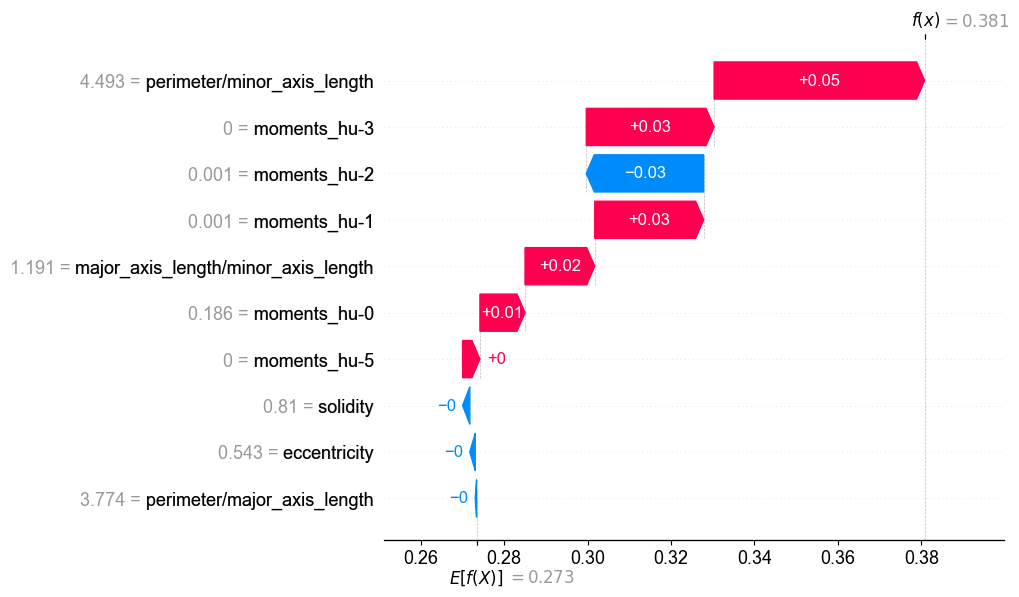

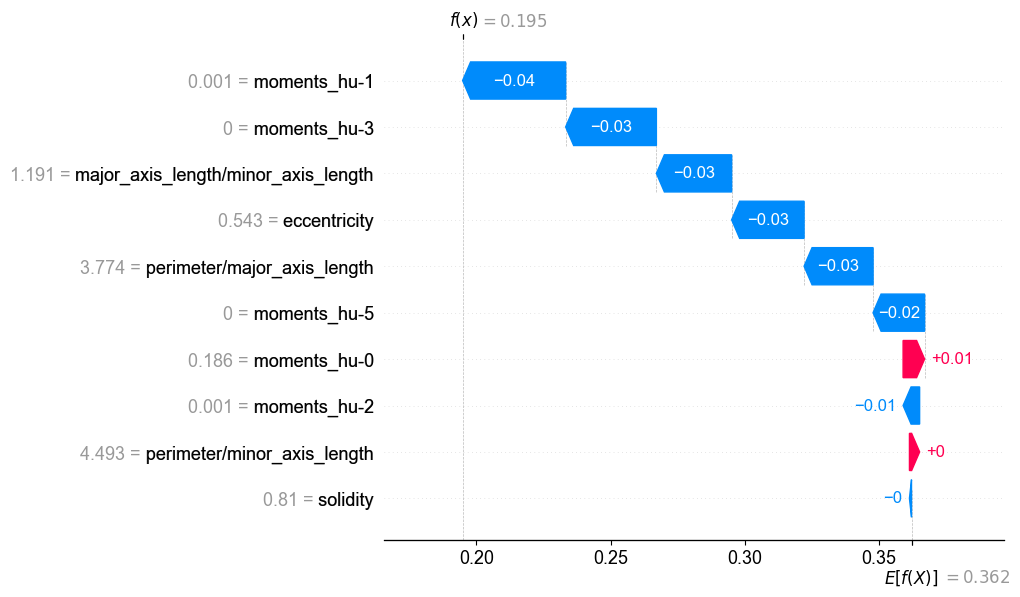

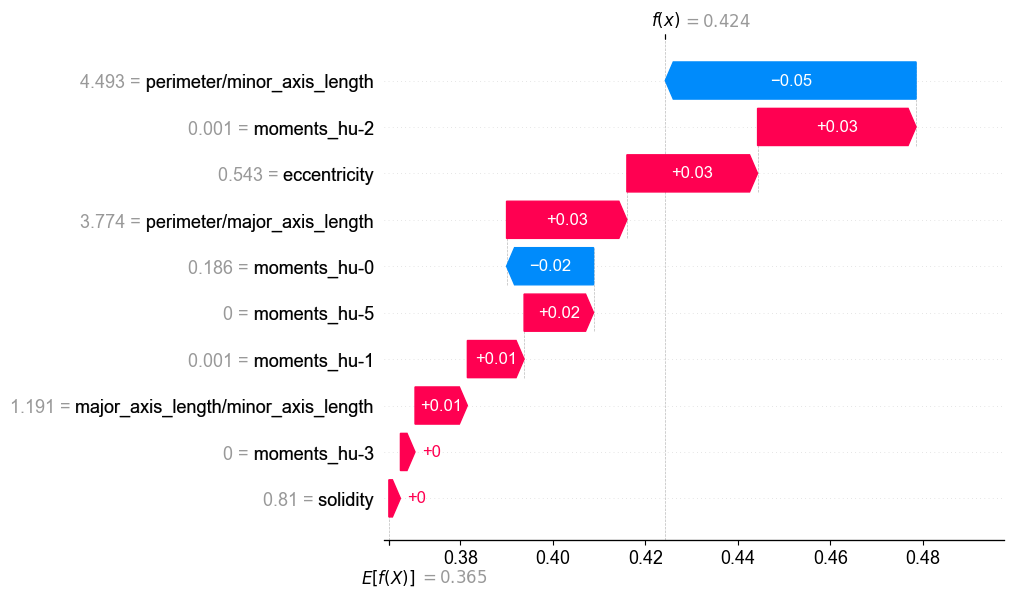

In [43]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[0,:,0]) # Crystal
shap.plots.waterfall(shap_values[0,:,1]) # Incomplete
shap.plots.waterfall(shap_values[0,:,2]) # Multicrystal

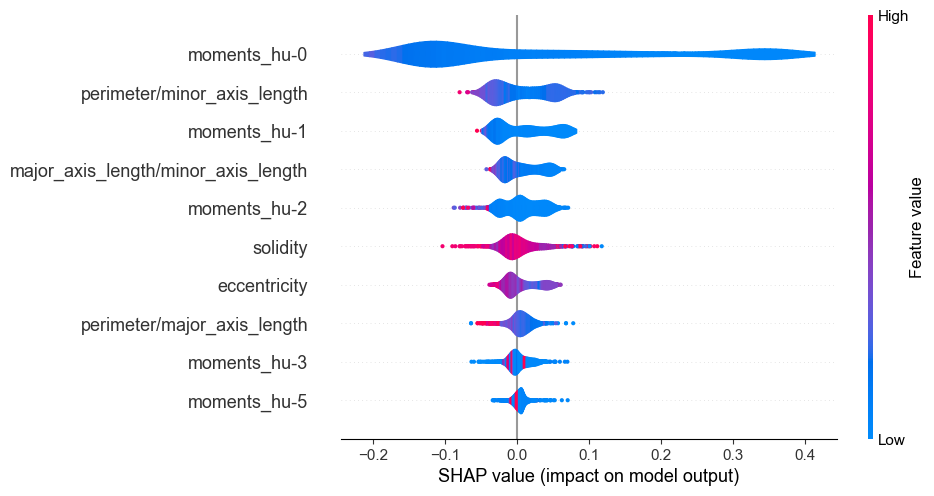

In [44]:
shap.plots.violin(shap_values[:,:,0]) # Crystal

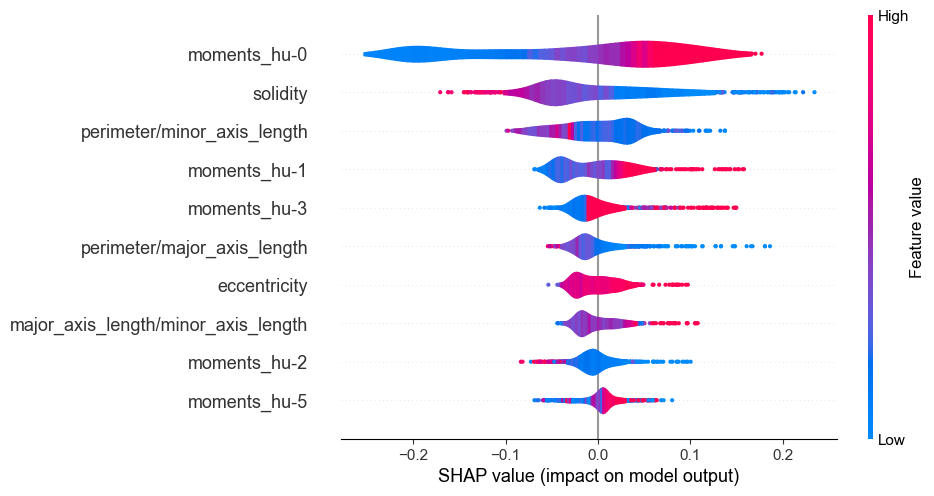

In [45]:
shap.plots.violin(shap_values[:,:,1]) # Incomplete

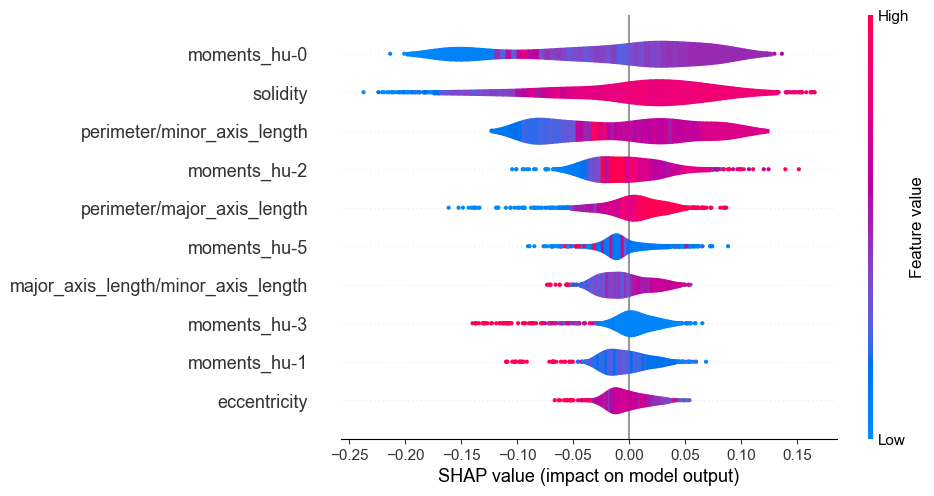

In [46]:
shap.plots.violin(shap_values[:,:,2]) # Multicrystal